# Linear Regression

In [1]:
from sklearn.linear_model import LinearRegression
reg =LinearRegression()
reg.fit([[0, 0], [1, 1], [2, 2]], [0, 1, 2])

LinearRegression()

In [2]:
reg.coef_

array([0.5, 0.5])

In [3]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
X,y = load_diabetes(return_X_y = True)
X = X[:,[2]]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 20,shuffle = False)

In [4]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression().fit(X_train,y_train)

In [5]:
from sklearn.metrics import mean_squared_error,r2_score
y_pred = regressor.predict(X_test)
print(f"Mean squared error: {mean_squared_error(y_test, y_pred):.2f}")
print(f"Coefficient of determination: {r2_score(y_test, y_pred):.2f}")

Mean squared error: 2548.07
Coefficient of determination: 0.47


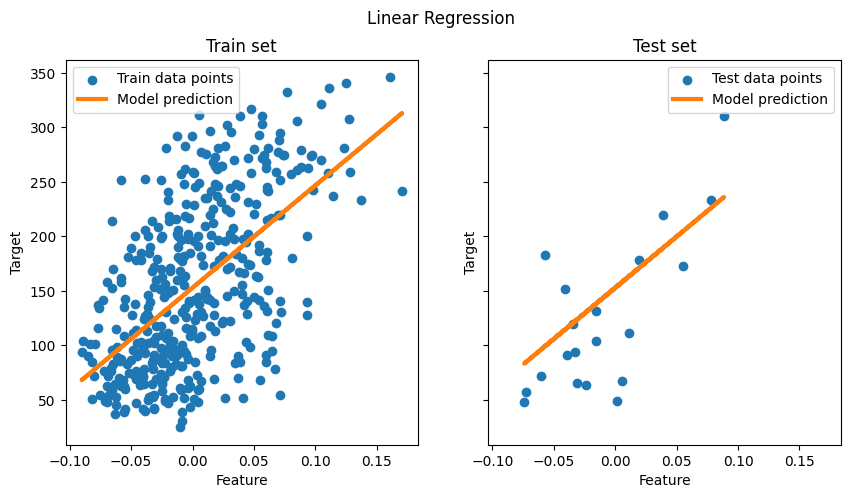

In [6]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(ncols=2, figsize=(10, 5), sharex=True, sharey=True)
ax[0].scatter(X_train,y_train,label="Train data points")
ax[0].plot(X_train,regressor.predict(X_train),
                                     linewidth=3,
                                     color="tab:orange",
                                     label="Model prediction",)

ax[0].set(xlabel = "Feature",ylabel="Target",title="Train set")
ax[0].legend()

ax[1].scatter(X_test,y_test,label="Test data points")
ax[1].plot(X_test,y_pred,linewidth=3,color="tab:orange",label="Model prediction")
ax[1].set(xlabel="Feature",ylabel="Target",title="Test set")
ax[1].legend()

fig.suptitle("Linear Regression")
plt.show()

# Ridge regression and classification

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import Ridge

X = 1.0/(np.arange(1,11)+np.arange(0,10)[:,np.newaxis])
y = np.ones(10)

In [8]:
print(X)
print(len(X))
print(X.dtype)
print(X.shape)

[[1.         0.5        0.33333333 0.25       0.2        0.16666667
  0.14285714 0.125      0.11111111 0.1       ]
 [0.5        0.33333333 0.25       0.2        0.16666667 0.14285714
  0.125      0.11111111 0.1        0.09090909]
 [0.33333333 0.25       0.2        0.16666667 0.14285714 0.125
  0.11111111 0.1        0.09090909 0.08333333]
 [0.25       0.2        0.16666667 0.14285714 0.125      0.11111111
  0.1        0.09090909 0.08333333 0.07692308]
 [0.2        0.16666667 0.14285714 0.125      0.11111111 0.1
  0.09090909 0.08333333 0.07692308 0.07142857]
 [0.16666667 0.14285714 0.125      0.11111111 0.1        0.09090909
  0.08333333 0.07692308 0.07142857 0.06666667]
 [0.14285714 0.125      0.11111111 0.1        0.09090909 0.08333333
  0.07692308 0.07142857 0.06666667 0.0625    ]
 [0.125      0.11111111 0.1        0.09090909 0.08333333 0.07692308
  0.07142857 0.06666667 0.0625     0.05882353]
 [0.11111111 0.1        0.09090909 0.08333333 0.07692308 0.07142857
  0.06666667 0.0625     

In [9]:
print(y)
print(len(y))
print(y.dtype)
print(y.shape)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
10
float64
(10,)


In [10]:
n_alphas =200
alphas = np.logspace(-10,-2,n_alphas)
coefs = []

for a in alphas:
    ridge = Ridge(alpha=a,fit_intercept=False)
    ridge.fit(X,y)
    coefs.append(ridge.coef_)

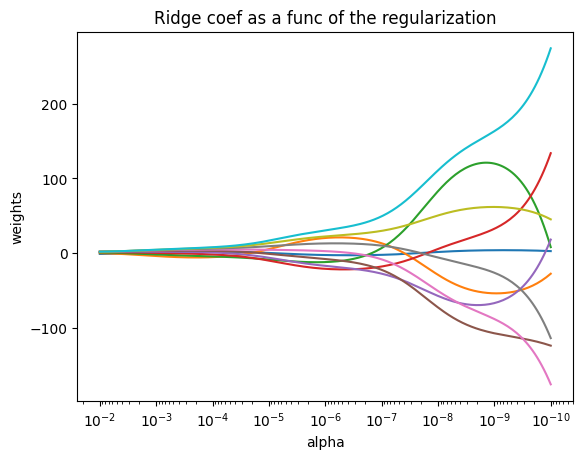

In [11]:
ax = plt.gca()

ax.plot(alphas,coefs)
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])
plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("Ridge coef as a func of the regularization")
plt.axis("tight")
plt.show()

# Lasso

## L1 based models for sparse signals

In [12]:
import numpy as np

rng = np.random.RandomState(0)
n_samples, n_features, n_informative = 50,100,10
time_step = np.linspace(-2,2,n_samples)
freqs = 2*np.pi*np.sort(rng.rand(n_features))/0.01
X = np.zeros((n_samples,n_features))

for i in range(n_features):
    X[:,i] = np.sin(freqs[i]*time_step)

idx = np.arange(n_features)
true_coef = (-1)**idx*np.exp(-idx/10)
true_coef[n_informative:] = 0
y= np.dot(X,true_coef)

In [13]:
print(X)
print(X.dtype)
print(X.shape)

[[ 0.37340415  0.99874953 -0.1347355  ... -0.80074862  0.986345
   0.89034269]
 [ 0.58389074  0.61078971  0.78095654 ... -0.69067059  0.99553074
   0.61988189]
 [ 0.76067358 -0.30191035  0.93703961 ... -0.56157487  0.99971888
   0.23681576]
 ...
 [-0.76067358  0.30191035 -0.93703961 ...  0.56157487 -0.99971888
  -0.23681576]
 [-0.58389074 -0.61078971 -0.78095654 ...  0.69067059 -0.99553074
  -0.61988189]
 [-0.37340415 -0.99874953  0.1347355  ...  0.80074862 -0.986345
  -0.89034269]]
float64
(50, 100)


In [14]:
print(y)
print(y.dtype)
print(y.shape)

[ 0.66483766 -0.34607065  1.75515571  1.04138273  2.13770726  0.05547268
  0.93822973  0.15663567  0.68944378  0.1644782   2.52431874 -0.71229083
  0.65800299 -2.35489796 -0.78756499 -0.31227919  0.53898518 -1.4189495
 -1.30325661 -0.10011712 -2.3580799  -1.82021661  1.11016898  0.09615576
  0.15473479 -0.15473479 -0.09615576 -1.11016898  1.82021661  2.3580799
  0.10011712  1.30325661  1.4189495  -0.53898518  0.31227919  0.78756499
  2.35489796 -0.65800299  0.71229083 -2.52431874 -0.1644782  -0.68944378
 -0.15663567 -0.93822973 -0.05547268 -2.13770726 -1.04138273 -1.75515571
  0.34607065 -0.66483766]
float64
(50,)


In [15]:
freqs[:n_informative]

array([ 2.9502547 , 11.8059798 , 12.63394388, 12.70359377, 24.62241605,
       37.84077985, 40.30506066, 44.63327171, 54.74495357, 59.02456369])

In [16]:
for i in range(n_features):
    X[:,i] = np.sin(freqs[i]*time_step+2*(rng.random_sample()-0.05))
    X[:,i]+= 0.2*rng.normal(0,1,n_samples)

y+=0.2*rng.normal(0,1,n_samples)

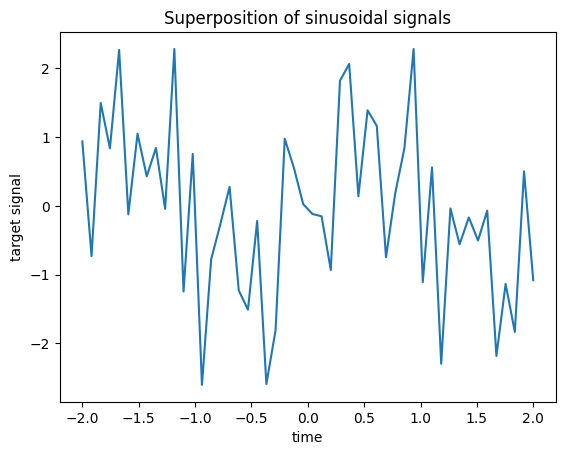

In [17]:
import matplotlib.pyplot as plt

plt.plot(time_step,y)
plt.ylabel("target signal")
plt.xlabel("time")
_ = plt.title("Superposition of sinusoidal signals")

In [18]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.5,shuffle=False)

In [19]:
from time import time 
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

t0=time()
lasso = Lasso(alpha=0.14).fit(X_train,y_train)
print(f"Lasso fit done in {(time() - t0):.3f}s")

y_pred_lasso = lasso.predict(X_test)
r2_score_lasso = r2_score(y_test,y_pred_lasso)
print(f"Lasso r^2 on test data : {r2_score_lasso:.3f}")

Lasso fit done in 0.001s
Lasso r^2 on test data : 0.223


## Automatic Relevance Determination(ARD)

In [20]:
from sklearn.linear_model import ARDRegression

t0=time()
ard = ARDRegression().fit(X_train,y_train)
print(f"ARD fit done in {(time() - t0):.3f}s")

y_pred_ard = ard.predict(X_test)
r2_score_ard = r2_score(y_test, y_pred_ard)
print(f"ARD r^2 on test data : {r2_score_ard:.3f}")

ARD fit done in 0.004s
ARD r^2 on test data : -0.210


## ElasticNet

In [21]:
from sklearn.linear_model import ElasticNet

t0=time()
enet = ElasticNet(alpha=0.08,l1_ratio=0.5).fit(X_train,y_train)
print(f"ElasticNet fit done in {(time() - t0):.3f}s")

y_pred_enet = enet.predict(X_test)
r2_score_enet = r2_score(y_test, y_pred_enet)
print(f"ElasticNet r^2 on test data : {r2_score_enet:.3f}")

ElasticNet fit done in 0.002s
ElasticNet r^2 on test data : 0.026


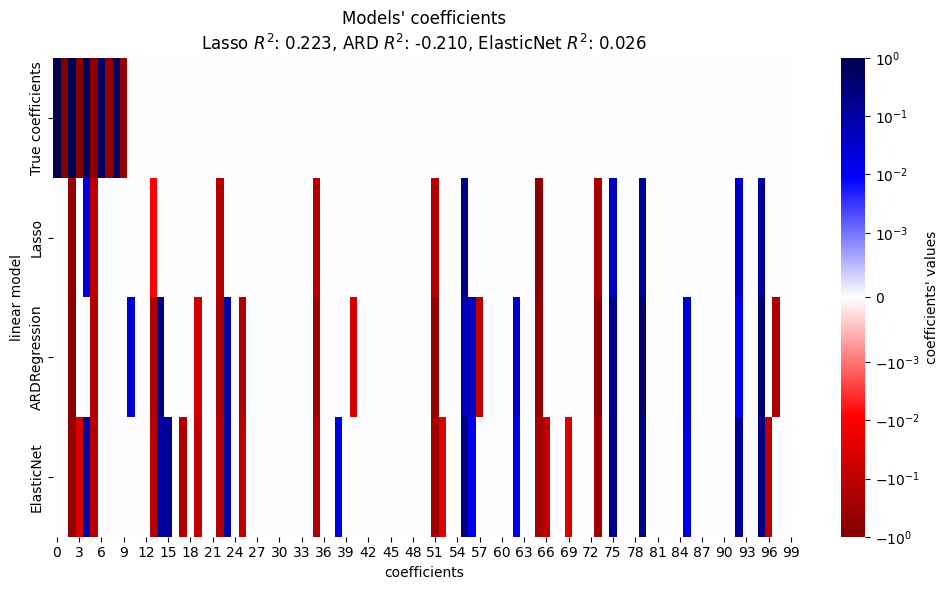

In [22]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.colors import SymLogNorm

df = pd.DataFrame(
    {
        "True coefficients": true_coef,
        "Lasso": lasso.coef_,
        "ARDRegression": ard.coef_,
        "ElasticNet": enet.coef_,
    }
)

plt.figure(figsize=(10, 6))
ax = sns.heatmap(
    df.T,
    norm=SymLogNorm(linthresh=10e-4, vmin=-1, vmax=1),
    cbar_kws={"label": "coefficients' values"},
    cmap="seismic_r",
)
plt.ylabel("linear model")
plt.xlabel("coefficients")
plt.title(
    f"Models' coefficients\nLasso $R^2$: {r2_score_lasso:.3f}, "
    f"ARD $R^2$: {r2_score_ard:.3f}, "
    f"ElasticNet $R^2$: {r2_score_enet:.3f}"
)
plt.tight_layout()